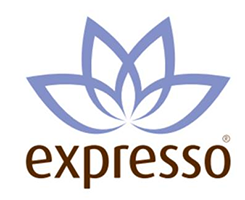

## Expresso Churn Prediction Challenge

**Description.**
Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

**The Variable and their defination:**

|User ID|English|
| :--- | :---|
REGION |The location of each client|
TENURE	|duration in the network|
MONTANT	|Top-up amount|
FREQUENCE_RECH	|Â number of times the customer refilled|
REVENUE	|client	monthly income of each client|
ARPU_SEGMENT|income over 90 days / 3|
FREQUENCE |number of times the client has made an income|
DATA_VOLUME|number of connections|
ON_NET|	inter expresso call|
ORANGE|call to orange|
TIGO |call to Tigo|
ZONE1	|call to zones1|
ZONE2	|call to zones2|
MRG	Â |a client who is going|
REGULARITY|number of times the client is active for 90 days|
TOP_PACK|the most active packs|
FREQ_TOP_PACK|number of times the client has activated the top pack packages|
CHURN|variable to predict - Target|

In [171]:
# import data .
# previous data 
test=pd.read_csv("Test.csv")
train=pd.read_csv("Train.csv")
sample_sub=pd.read_csv("SampleSubmission.csv")
Variables=pd.read_csv("VariableDefinitions.csv")
# Current data

df_pack = pd.read_csv("TOP_PACK.csv")

In [172]:
display("Test data")
display(test.head())

'Test data'

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [173]:
display('Train Data')
display(train.head())

'Train Data'

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [174]:
display('Sample Submission')
display(sample_sub.head())

'Sample Submission'

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [175]:
data=pd.concat([test,train],ignore_index=True)

In [176]:
# Vlookup for the python.
data=pd.merge(data,df_pack, on='TOP_PACK',how='outer')

In [177]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06
mean,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01
std,7.112086e+03,1.326936e+01,7.188312e+03,2.396100e+03,1.468782e+01,1.311735e+04,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.362000e+03,2.454000e+03,2.000000e+01,2.893000e+03,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [178]:
data.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN', 'Package'],
      dtype='object')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534204 entries, 0 to 2534203
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      float64
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
 19  Package         object 
dtypes: float64(14), object(6)
memory usage: 406.0+ MB


In [180]:
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,Package
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42.0,On-net 1000F=10MilF;10d,5.0,NaN,On net
1,00232dd1a32d6cf19e7303fb273bd4af293dd174,SAINT-LOUIS,K > 24 month,1000.0,1.0,1000.0,333.0,1.0,NaN,50.0,NaN,NaN,NaN,NaN,NO,15.0,On-net 1000F=10MilF;10d,1.0,NaN,On net
2,00272a0dd86105139bf3e220c57648b3e30441d6,SAINT-LOUIS,K > 24 month,10500.0,8.0,11499.0,3833.0,10.0,NaN,724.0,39.0,58.0,NaN,NaN,NO,62.0,On-net 1000F=10MilF;10d,5.0,NaN,On net
3,0029072c7ddc255bd4b8080dcdab7cfb0520ea12,DAKAR,K > 24 month,2200.0,4.0,2200.0,733.0,4.0,0.0,209.0,43.0,5.0,NaN,NaN,NO,55.0,On-net 1000F=10MilF;10d,1.0,NaN,On net
4,002b776fe886cc656ff96208da0d89298dcd08a8,THIES,K > 24 month,12200.0,13.0,11837.0,3946.0,16.0,5638.0,665.0,75.0,10.0,2.0,NaN,NO,62.0,On-net 1000F=10MilF;10d,8.0,NaN,On net


***Checking for duplication***

In [181]:
data.duplicated().sum()

0

In [182]:
data.isnull().sum()

user_id                29
REGION             999056
TENURE                 29
MONTANT            889823
FREQUENCE_RECH     889823
REVENUE            853450
ARPU_SEGMENT       853450
FREQUENCE          853450
DATA_VOLUME       1247502
ON_NET             925218
ORANGE            1052507
TIGO              1517046
ZONE1             2334622
ZONE2             2373304
MRG                    29
REGULARITY             29
TOP_PACK          1061373
FREQ_TOP_PACK     1061402
CHURN              380156
Package           1518519
dtype: int64

In [183]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06
mean,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01
std,7.112086e+03,1.326936e+01,7.188312e+03,2.396100e+03,1.468782e+01,1.311735e+04,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.362000e+03,2.454000e+03,2.000000e+01,2.893000e+03,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [184]:
# Separate the categorical columns and numerical
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [185]:
display("The numerical columns in the data")
display(numerical_columns)

display("The categorical columns in the data")
display(categorical_columns)

'The numerical columns in the data'

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'CHURN']

'The categorical columns in the data'

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK', 'Package']

In [186]:
data[['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']].nunique()

user_id     2534175
REGION           14
TENURE            8
MRG               1
TOP_PACK        171
dtype: int64

In [187]:
data[['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']].isnull().sum()

user_id          29
REGION       999056
TENURE           29
MRG              29
TOP_PACK    1061373
dtype: int64

In [188]:
data['REGION'].unique()

array(['THIES', 'SAINT-LOUIS', 'DAKAR', 'DIOURBEL', nan, 'KAOLACK',
       'KOLDA', 'LOUGA', 'ZIGUINCHOR', 'TAMBACOUNDA', 'MATAM', 'KAFFRINE',
       'FATICK', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [189]:
data['TENURE'].unique()

array(['K > 24 month', 'J 21-24 month', 'I 18-21 month', 'G 12-15 month',
       'H 15-18 month', 'D 3-6 month', 'F 9-12 month', 'E 6-9 month', nan],
      dtype=object)

DAKAR          603886
THIES          211795
SAINT-LOUIS    141255
LOUGA          116458
KAOLACK        113956
DIOURBEL        78603
TAMBACOUNDA     64893
KAFFRINE        51717
KOLDA           45548
FATICK          42003
MATAM           34315
ZIGUINCHOR      25847
SEDHIOU          3662
KEDOUGOU         1210
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

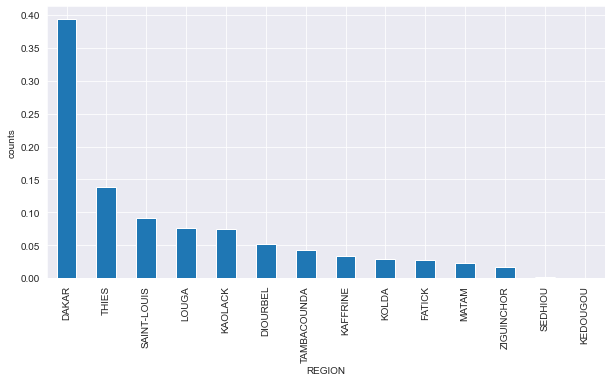

In [190]:
print(data['REGION'].value_counts())
plt.figure(figsize=(10,5))
data['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2403551
I 18-21 month      53431
H 15-18 month      30646
G 12-15 month      17577
J 21-24 month      14940
F 9-12 month       10982
E 6-9 month         2137
D 3-6 month          911
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

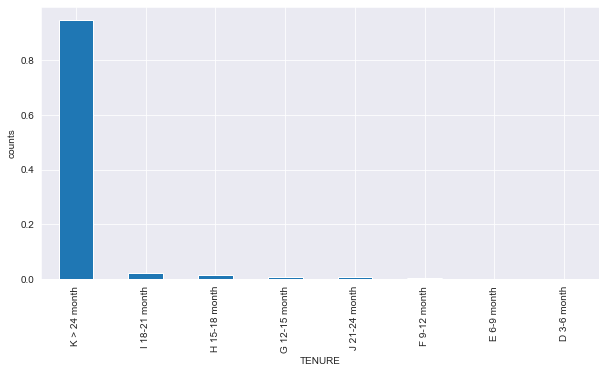

In [191]:
print(data['TENURE'].value_counts())
plt.figure(figsize=(10,5))
data['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2534175
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

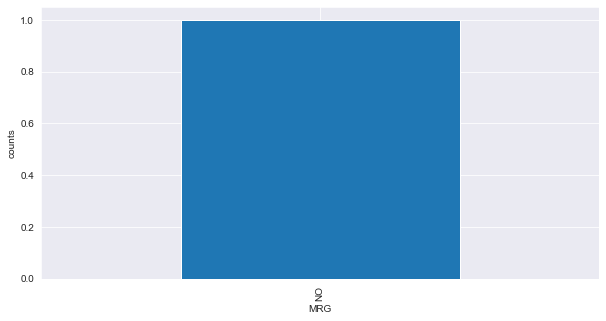

In [192]:
print(data['MRG'].value_counts())
plt.figure(figsize=(10,5))
data['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

In [193]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06
mean,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01
std,7.112086e+03,1.326936e+01,7.188312e+03,2.396100e+03,1.468782e+01,1.311735e+04,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.362000e+03,2.454000e+03,2.000000e+01,2.893000e+03,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


All-net                              456011
On net                               238631
MIXT                                 178531
Jokko                                 54660
IVR                                   33778
Twter_U2opia                          21306
VAS                                   17548
Data                                   5938
Unlimited                              1798
MROMO                                  1279
pilot                                  1181
Facebook                                857
WIFI                                    787
CVM                                     736
SUPERMAGIK                              620
Yewouleen                               531
New_YAKALMA                             505
FNF                                     291
EVC                                     246
Staff_CPE_Rent                          120
FIFA                                    117
TelmunCRBT                               92
Bonus                           

Text(0.5, 0, 'Package')

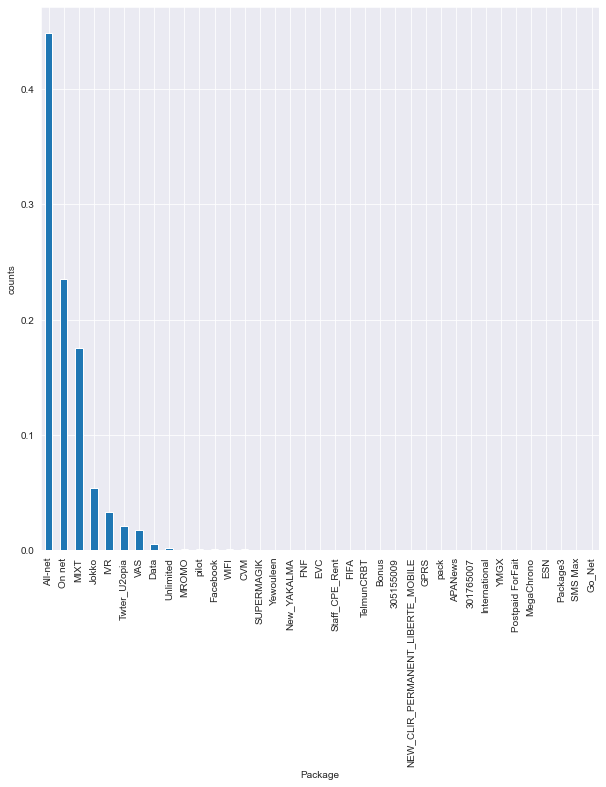

In [194]:
#probaly not the best way to visualize this
print(data['Package'].value_counts())
plt.figure(figsize=(10,10))
data['Package'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Package')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

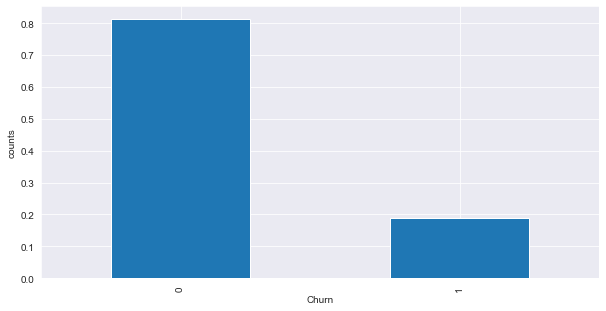

In [195]:
#Check if the predictor class is balanced 
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

1. Missing Values
2. Outliers
3. Duplicate

In [196]:
data['TENURE'].unique()

array(['K > 24 month', 'J 21-24 month', 'I 18-21 month', 'G 12-15 month',
       'H 15-18 month', 'D 3-6 month', 'F 9-12 month', 'E 6-9 month', nan],
      dtype=object)

In [197]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06
mean,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01
std,7.112086e+03,1.326936e+01,7.188312e+03,2.396100e+03,1.468782e+01,1.311735e+04,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.362000e+03,2.454000e+03,2.000000e+01,2.893000e+03,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [198]:
# Convert the tenure to numerical data.

def term_months(row):
    """ segmenting the data into tenure to terms.
    
    """
    if row['TENURE'] == 'K > 24 month':
        return 24
    elif row['TENURE'] == 'I 18-21 month':
        return 19.5
    elif row['TENURE'] == 'J 21-24 month':
        return 23.5
    elif row['TENURE'] == 'F 9-12 month':
        return 10.5
    elif row['TENURE'] == 'G 12-15 month':
        return 13.5
    elif row['TENURE'] == 'H 15-18 month':
        return 16.5
    elif row['TENURE'] == 'E 6-9 month':
        return 7.5
    else:
        return 4.5
data['Tenure(Months)'] = data.apply(term_months, axis=1)

In [199]:
data['Tenure(Year)']=(data['Tenure(Months)']/12).apply(int)

In [200]:
data['Tenure(Year)'].unique()

array([2, 1, 0], dtype=int64)

In [201]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,Tenure(Months),Tenure(Year)
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06,2.534204e+06,2.534204e+06
mean,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01,2.365900e+01,1.942896e+00
std,7.112086e+03,1.326936e+01,7.188312e+03,2.396100e+03,1.468782e+01,1.311735e+04,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01,1.708058e+00,2.548296e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
75%,7.350000e+03,1.600000e+01,7.362000e+03,2.454000e+03,2.000000e+01,2.893000e+03,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00,2.400000e+01,2.000000e+00
max,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00,2.400000e+01,2.000000e+00


### Duplication on the numerical data.

In [202]:
# Separate the categorical columns and numerical
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

display("The numerical columns in the data")
display(numerical_columns)

display("The categorical columns in the data")
display(categorical_columns)

'The numerical columns in the data'

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'CHURN',
 'Tenure(Months)',
 'Tenure(Year)']

'The categorical columns in the data'

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK', 'Package']

The following are the numerical data so based on the above description the following columns 75% quartile deviation from the maximum value is way too high.
1. MONTANT
2. FREQUENCE_RECH
3. REVENUE
4. ARPU_SEGMENT
5. FREQUENCE
6. DATA_VOLUME
7. ON_NET
8. ORANGE
9. TIGO
10. ZONE1
11. ZONE2
12. FREQ_TOP_PACK

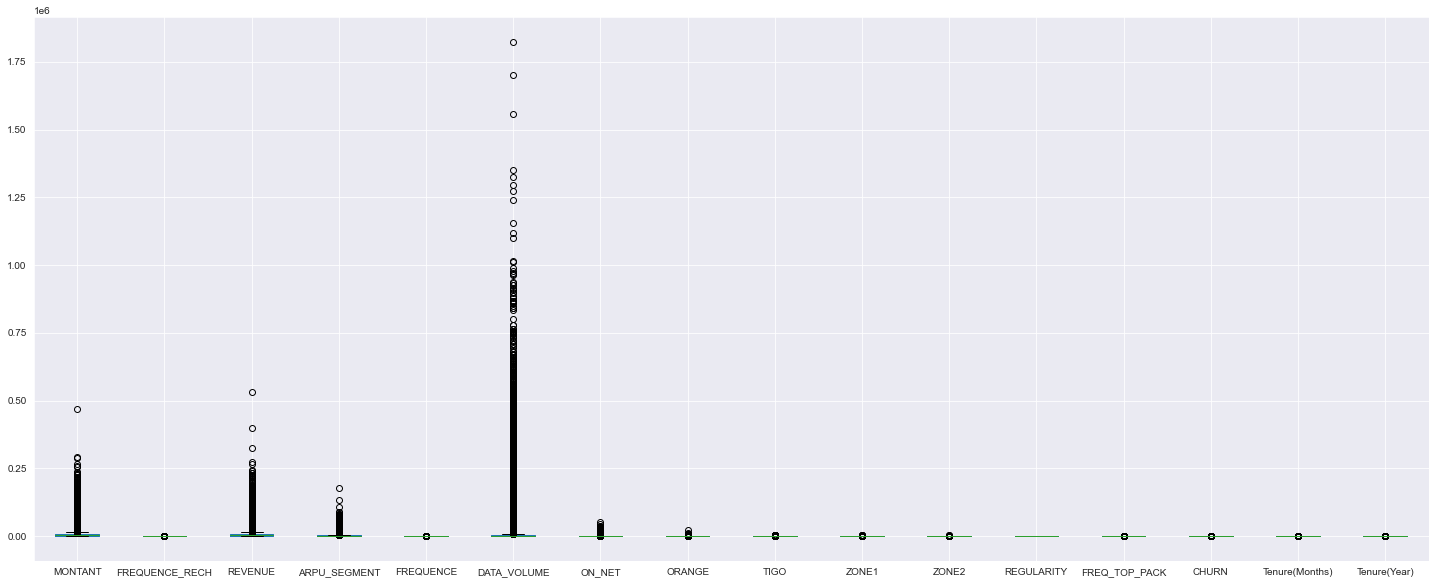

In [203]:
# indentify the outliers in the datasets
data.plot(figsize=(25,10),kind='box')
plt.show()

In [204]:
'''
import seaborn as sns
g = sns.PairGrid(data, x_vars=["MONTANT","FREQUENCE_RECH","REVENUE","ARPU_SEGMENT",
"FREQUENCE","DATA_VOLUME","ON_NET","ORANGE","TIGO","ZONE1","ZONE2","FREQ_TOP_PACK"], height=4)
g.map(sns.boxplot, color=".3")
'''

'\nimport seaborn as sns\ng = sns.PairGrid(data, x_vars=["MONTANT","FREQUENCE_RECH","REVENUE","ARPU_SEGMENT",\n"FREQUENCE","DATA_VOLUME","ON_NET","ORANGE","TIGO","ZONE1","ZONE2","FREQ_TOP_PACK"], height=4)\ng.map(sns.boxplot, color=".3")\n'

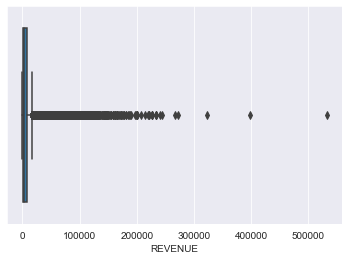

In [205]:
sns.boxplot(data=data,x=data['REVENUE']);

In [ ]:
for col in data.columns:
    percentiles = data['REVENUE'].quantile([0.01, 0.99]).values
    data['REVENUE'] = np.clip(data['REVENUE'], percentiles[0], percentiles[1])

In [170]:
data['REVENUE'] = np.where(data['REVENUE'] > upper_lim, upper_lim, data['REVENUE'])
data['REVENUE'] = np.where(data['REVENUE'] < lower_lim, lower_lim, data['REVENUE'])
data.describe()

,REGION,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,Package,Tenure(Months),Tenure(Year)
count,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534175e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06
mean,8.297959e+00,5.531041e+03,1.152773e+01,5.078315e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314e+00,7.568571e+00,2.804838e+01,1.119409e+02,9.270827e+00,1.594134e-01,2.706905e+01,2.365900e+01,1.942896e+00
std,5.891245e+00,5.728981e+03,1.068884e+01,3.907866e+03,1.951354e+03,1.196158e+01,9.346827e+03,6.955553e+02,1.566231e+02,4.042022e+01,1.190120e+01,8.420440e+00,2.228719e+01,6.319694e+01,9.360606e+00,3.660612e-01,1.339564e+01,1.708058e+00,2.548296e-01
min,0.000000e+00,1.000000e+01,1.000000e+00,2.830000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+03,4.000000e+00,1.901000e+03,6.340000e+02,6.000000e+00,2.310000e+02,1.200000e+01,2.000000e+01,1.100000e+01,8.169314e+00,7.568571e+00,6.000000e+00,3.800000e+01,4.000000e+00,0.000000e+00,1.700000e+01,2.400000e+01,2.000000e+00
50%,1.100000e+01,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.130000e+02,9.538476e+01,2.310065e+01,8.169314e+00,7.568571e+00,2.400000e+01,1.350000e+02,9.270827e+00,0.000000e+00,3.700000e+01,2.400000e+01,2.000000e+00
75%,1.400000e+01,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314e+00,7.568571e+00,5.100000e+01,1.710000e+02,9.270827e+00,0.000000e+00,3.700000e+01,2.400000e+01,2.000000e+00
max,1.400000e+01,4.700000e+05,1.460000e+02,1.562800e+04,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4.792000e+03,3.697000e+03,6.200000e+01,1.710000e+02,7.130000e+02,1.000000e+00,3.700000e+01,2.400000e+01,2.000000e+00


In [ ]:
sns.boxplot(data=data,x=data['DATA_VOLUME']);

In [ ]:
Q1=data['DATA_VOLUME'].quantile(0.25)
Q3=data['DATA_VOLUME'].quantile(0.75)
IQR = Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
#remove the outliers.
data = data[data['DATA_VOLUME']< Upper_Whisker]

In [ ]:
sns.boxplot(data=data,x=data['MONTANT']);

In [ ]:
Q1=data['MONTANT'].quantile(0.25)
Q3=data['MONTANT'].quantile(0.75)
IQR = Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
#remove the outliers.
data = data[data['MONTANT']< Upper_Whisker]

In [136]:
df_null_per=data.isnull().sum()/len(data)*100
df_null_per.sort_values(ascending = False)

ZONE2             93.650866
ZONE1             92.124470
Package           59.920946
TIGO              59.862821
DATA_VOLUME       49.226582
FREQ_TOP_PACK     41.883053
TOP_PACK          41.881908
ORANGE            41.532055
REGION            39.422872
ON_NET            36.509216
MONTANT           35.112524
FREQUENCE_RECH    35.112524
REVENUE           33.677241
ARPU_SEGMENT      33.677241
FREQUENCE         33.677241
CHURN             15.001002
user_id            0.001144
REGULARITY         0.001144
MRG                0.001144
TENURE             0.001144
Tenure(Months)     0.000000
Tenure(Year)       0.000000
dtype: float64

In [137]:
# converting the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['REGION'] = le.fit_transform(data['REGION'])
data['MRG']=le.fit_transform(data['MRG'])
data['TOP_PACK']=le.fit_transform(data['TOP_PACK'])
data['Package']=le.fit_transform(data['Package'])

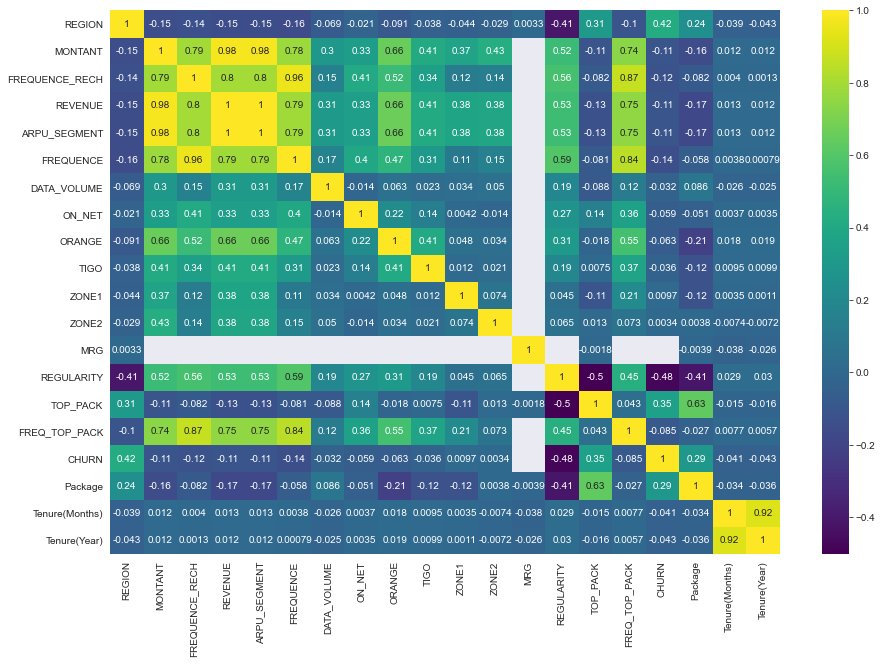

In [138]:
import seaborn as sns
cm = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap = 'viridis');

In [ ]:
#We will drop REGION, TOP_PACK, and MRG
#We will also replace the missing values for the numerical columns with their means (averages)

In [139]:
data=data.drop(['MRG','TENURE'], axis=1) #drop these columns

In [140]:
# filling categorical data using ffill
data['REGION']=data['REGION'].fillna(method ='Ffill')
data['TOP_PACK']=data['TOP_PACK'].fillna(method ='Ffill')
data['Package']= data['Package'].fillna(method='Ffill')

In [141]:
# fill the numerical data using mean.
data['MONTANT'].fillna((data['MONTANT'].mean()), inplace=True)
data['FREQUENCE_RECH'].fillna((data['FREQUENCE_RECH'].mean()), inplace=True)
data['REVENUE'].fillna((data['REVENUE'].mean()), inplace=True)
data['ARPU_SEGMENT'].fillna((data['ARPU_SEGMENT'].mean()), inplace=True)
data['FREQUENCE'].fillna((data['FREQUENCE'].mean()), inplace=True)
data['DATA_VOLUME'].fillna((data['DATA_VOLUME'].mean()), inplace=True)
data['ON_NET'].fillna((data['ON_NET'].mean()), inplace=True)
data['ORANGE'].fillna((data['ORANGE'].mean()), inplace=True)
data['TIGO'].fillna((data['TIGO'].mean()), inplace=True)
data['ZONE1'].fillna((data['ZONE1'].mean()), inplace=True)
data['ZONE2'].fillna((data['ZONE2'].mean()), inplace=True)
data['FREQ_TOP_PACK'].fillna((data['FREQ_TOP_PACK'].mean()), inplace=True)
data['Tenure(Months)'].fillna((data['Tenure(Months)'].mean()),inplace=True)

In [142]:
data.head()

,user_id,REGION,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,Package,Tenure(Months),Tenure(Year)
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,12,5000.0,5.0,5000.0,1667.0,5.0,3363.395667,378.0,11.000000,5.000000,8.169314,7.568571,42.0,136,5.0,NaN,22,24.0,2
1,00232dd1a32d6cf19e7303fb273bd4af293dd174,9,1000.0,1.0,1000.0,333.0,1.0,3363.395667,50.0,95.384757,23.100647,8.169314,7.568571,15.0,136,1.0,NaN,22,24.0,2
2,00272a0dd86105139bf3e220c57648b3e30441d6,9,10500.0,8.0,11499.0,3833.0,10.0,3363.395667,724.0,39.000000,58.000000,8.169314,7.568571,62.0,136,5.0,NaN,22,24.0,2
3,0029072c7ddc255bd4b8080dcdab7cfb0520ea12,0,2200.0,4.0,2200.0,733.0,4.0,0.000000,209.0,43.000000,5.000000,8.169314,7.568571,55.0,136,1.0,NaN,22,24.0,2
4,002b776fe886cc656ff96208da0d89298dcd08a8,12,12200.0,13.0,11837.0,3946.0,16.0,5638.000000,665.0,75.000000,10.000000,2.000000,7.568571,62.0,136,8.0,NaN,22,24.0,2


In [143]:
data.isnull().sum()

user_id               29
REGION                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
REGULARITY            29
TOP_PACK               0
FREQ_TOP_PACK          0
CHURN             380156
Package                0
Tenure(Months)         0
Tenure(Year)           0
dtype: int64

In [144]:
# standardize the numerical variables.
from sklearn.preprocessing import StandardScaler

#data['MONTANT']=StandardScaler().fit_transform(data['MONTANT'])
'''
data['REVENUE']=StandardScaler().fit_transform(data['REVENUE'])
data['ARPU_SEGMENT']=StandardScaler().fit_transform(data['ARPU_SEGMENT'])
data['FREQUENCE']=StandardScaler().fit_transform(data['FREQUENCE'])
data['DATA_VOLUME']=StandardScaler().fit_transform(data['DATA_VOLUME'])
data['ON_NET']=StandardScaler().fit_transform(data['ON_NET'])
data['ORANGE']=StandardScaler().fit_transform(data['ORANGE'])
data['TIGO']=StandardScaler().fit_transform(data['TIGO'])
data['ZONE1']=StandardScaler().fit_transform(data['ZONE1'])
data['ZONE2']=StandardScaler().fit_transform(data['ZONE2'])
data['FREQ_TOP_PACK']=StandardScaler().fit_transform(data['FREQ_TOP_PACK'])
data['Tenure(Months)']=StandardScaler().fit_transform(data['Tenure(Months)'])
'''

"\ndata['REVENUE']=StandardScaler().fit_transform(data['REVENUE'])\ndata['ARPU_SEGMENT']=StandardScaler().fit_transform(data['ARPU_SEGMENT'])\ndata['FREQUENCE']=StandardScaler().fit_transform(data['FREQUENCE'])\ndata['DATA_VOLUME']=StandardScaler().fit_transform(data['DATA_VOLUME'])\ndata['ON_NET']=StandardScaler().fit_transform(data['ON_NET'])\ndata['ORANGE']=StandardScaler().fit_transform(data['ORANGE'])\ndata['TIGO']=StandardScaler().fit_transform(data['TIGO'])\ndata['ZONE1']=StandardScaler().fit_transform(data['ZONE1'])\ndata['ZONE2']=StandardScaler().fit_transform(data['ZONE2'])\ndata['FREQ_TOP_PACK']=StandardScaler().fit_transform(data['FREQ_TOP_PACK'])\ndata['Tenure(Months)']=StandardScaler().fit_transform(data['Tenure(Months)'])\n"

In [145]:
data.describe()

,REGION,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,Package,Tenure(Months),Tenure(Year)
count,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534204e+06,2.534175e+06,2.534204e+06,2.534204e+06,2.154048e+06,2.534204e+06,2.534204e+06,2.534204e+06
mean,8.297959e+00,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314e+00,7.568571e+00,2.804838e+01,1.119409e+02,9.270827e+00,1.875474e-01,2.706905e+01,2.365900e+01,1.942896e+00
std,5.891245e+00,5.728981e+03,1.068884e+01,5.854074e+03,1.951354e+03,1.196158e+01,9.346827e+03,6.955553e+02,1.566231e+02,4.042022e+01,1.190120e+01,8.420440e+00,2.228719e+01,6.319694e+01,9.360606e+00,3.903504e-01,1.339564e+01,1.708058e+00,2.548296e-01
min,0.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+03,4.000000e+00,1.901000e+03,6.340000e+02,6.000000e+00,2.310000e+02,1.200000e+01,2.000000e+01,1.100000e+01,8.169314e+00,7.568571e+00,6.000000e+00,3.800000e+01,4.000000e+00,0.000000e+00,1.700000e+01,2.400000e+01,2.000000e+00
50%,1.100000e+01,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.130000e+02,9.538476e+01,2.310065e+01,8.169314e+00,7.568571e+00,2.400000e+01,1.350000e+02,9.270827e+00,0.000000e+00,3.700000e+01,2.400000e+01,2.000000e+00
75%,1.400000e+01,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314e+00,7.568571e+00,5.100000e+01,1.710000e+02,9.270827e+00,0.000000e+00,3.700000e+01,2.400000e+01,2.000000e+00
max,1.400000e+01,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4.792000e+03,3.697000e+03,6.200000e+01,1.710000e+02,7.130000e+02,1.000000e+00,3.700000e+01,2.400000e+01,2.000000e+00


## Machine Learning

In [153]:
data['CHURN'] = np.nan_to_num(data['CHURN']).astype(int)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534204 entries, 0 to 2534203
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          int32  
 2   MONTANT         float64
 3   FREQUENCE_RECH  float64
 4   REVENUE         float64
 5   ARPU_SEGMENT    float64
 6   FREQUENCE       float64
 7   DATA_VOLUME     float64
 8   ON_NET          float64
 9   ORANGE          float64
 10  TIGO            float64
 11  ZONE1           float64
 12  ZONE2           float64
 13  REGULARITY      float64
 14  TOP_PACK        int32  
 15  FREQ_TOP_PACK   float64
 16  CHURN           int32  
 17  Package         int32  
 18  Tenure(Months)  float64
 19  Tenure(Year)    int64  
dtypes: float64(14), int32(4), int64(1), object(1)
memory usage: 367.4+ MB


In [147]:
data.columns.tolist()

['user_id',
 'REGION',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'TOP_PACK',
 'FREQ_TOP_PACK',
 'CHURN',
 'Package',
 'Tenure(Months)',
 'Tenure(Year)']

In [162]:
from sklearn.preprocessing import StandardScaler
X = data.drop(['user_id',"CHURN"],1).select_dtypes(exclude=['object'])
cols = X.columns
y = data["CHURN"]
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [163]:
# create training and testing variables
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(data[cols],y, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1900653, 18) (1900653,)
(633551, 18) (633551,)


In [164]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,train_X,train_Y,test_X,test_Y,cols=None):

    algorithm.fit(train_X[cols],train_Y)
    predictions = algorithm.predict(test_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,test_Y))
    print ("Recall score   : ", recall_score(predictions,test_Y))
    print ("classification report :\n",classification_report(predictions,test_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(test_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(test_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    plt.xlabel('TPR -(Sensitivity)')
    plt.ylabel('FPR -(Specificity)')


In [158]:
X_train, X_test, y_train, y_test = train_test_split(data[cols],y, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1900653, 18) (1900653,)
(633551, 18) (633551,)


In [165]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
y_pred=model(logit,X_train,y_train,X_test,y_test,X_train.columns)

print(y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
submission_logistic = pd.DataFrame({'user_id': data['user_id'], "CHURN": y_pred})
submission_logistic.to_csv('submit_loglinear.csv',index=False)

In [160]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model(gnb,X_train,y_train,X_test,y_test,X_train.columns)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
submission_Gaussian = pd.DataFrame({'user_id': data['user_id'], "CHURN": gnb})
submission_Gaussian.to_csv('submit_gaussian.csv',index=False)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
model(xgb,X_train,y_train,X_test,y_test,X_train.columns)

In [ ]:
submission_xgboost = pd.DataFrame({'user_id': data['user_id'], "CHURN": xgb})
submission_xgboost.to_csv('submit_xbclassifier.csv',index=False)